# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. KNN for non linear patterns**

- Implement the K-Nearest Neighbors algorithm for datasets with non linear shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$).

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)




---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = +1 $
- $ x_8 = [3, -2] $  with $y_8 = -1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


K-Nearest Neighbors

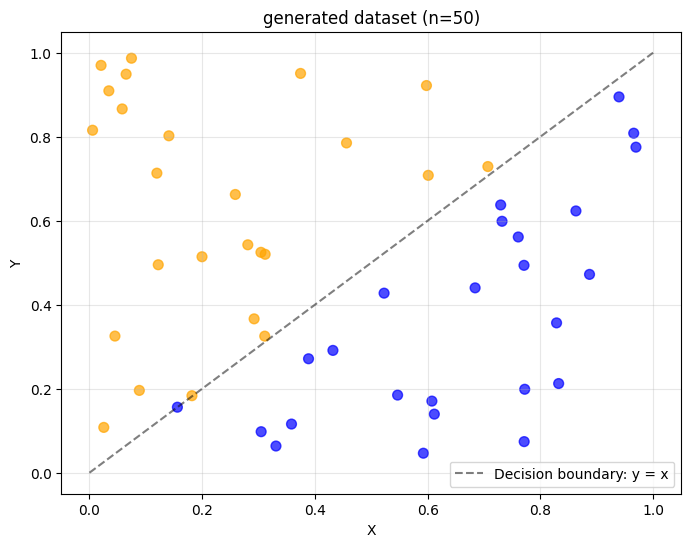

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

np.random.seed(42)
n = 50
X = np.random.rand(n, 2)

labels = (X[:, 1] > X[:, 0]).astype(int)
colors = ['blue' if label == 0 else 'orange' for label in labels]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=50)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Decision boundary: y = x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('generated dataset (n=50)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

preduction for (0.6, 0.7):
K =  1: orange
K =  3: orange
K =  5: orange
K =  7: orange
K = 10: blue
K = 15: orange
K = 20: blue


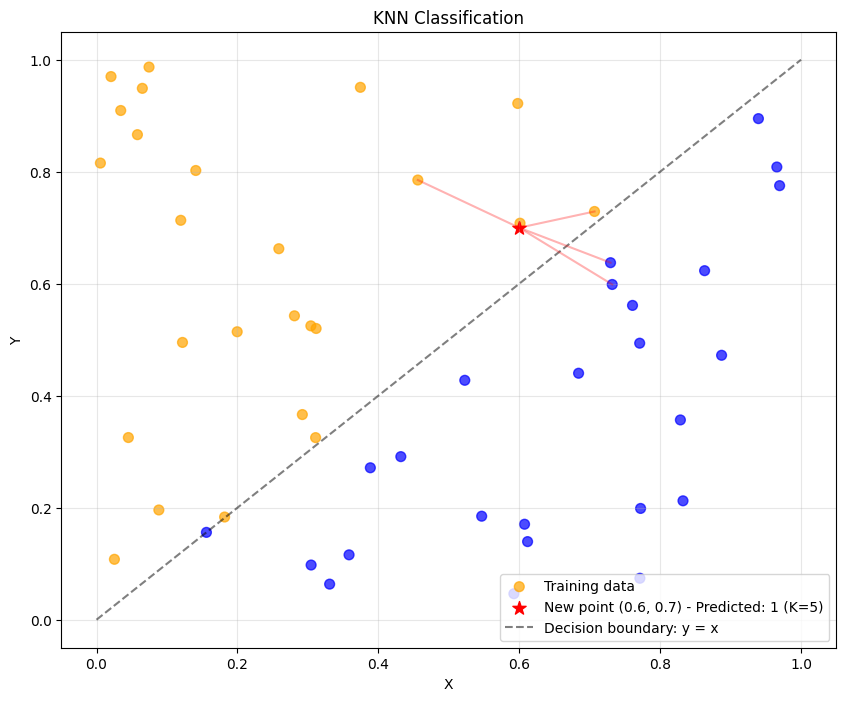

In [3]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

new_point = np.array([0.6, 0.7])

distances = []
for i, point in enumerate(X):
    dist = euclidean_distance(new_point, point)
    distances.append((dist, labels[i], point))

distances.sort(key=lambda x: x[0])

def predict_knn(k, distances):
    k_neighbors = distances[:k]
    neighbor_labels = [label for _, label, _ in k_neighbors]
    

    return 1 if sum(neighbor_labels) > k/2 else 0

k_values = [1, 3, 5, 7, 10, 15, 20]
predictions = []

print("preduction for (0.6, 0.7):")
for k in k_values:
    prediction = predict_knn(k, distances)
    predictions.append(prediction)
    color = 'orange' if prediction == 1 else 'blue'
    print(f"K = {k:2d}: {color}")

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=50, label='Training data')
plt.scatter(new_point[0], new_point[1], c='red', s=100, marker='*', 
           label=f'New point (0.6, 0.7) - Predicted: {predictions[2]} (K=5)')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Decision boundary: y = x')

k = 5
for i in range(k):
    neighbor_point = distances[i][2]
    plt.plot([new_point[0], neighbor_point[0]], 
             [new_point[1], neighbor_point[1]], 'r-', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
print("\nimpact analysis K:")
print("K too small (1, 3) - sensitive to noise, may overfit")
print("K moderate (5, 7) - good balance between stability and accuracy")
print("K too large (15, 20) - may underfit, ignores local features")


impact analysis K:
K too small (1, 3) - sensitive to noise, may overfit
K moderate (5, 7) - good balance between stability and accuracy
K too large (15, 20) - may underfit, ignores local features


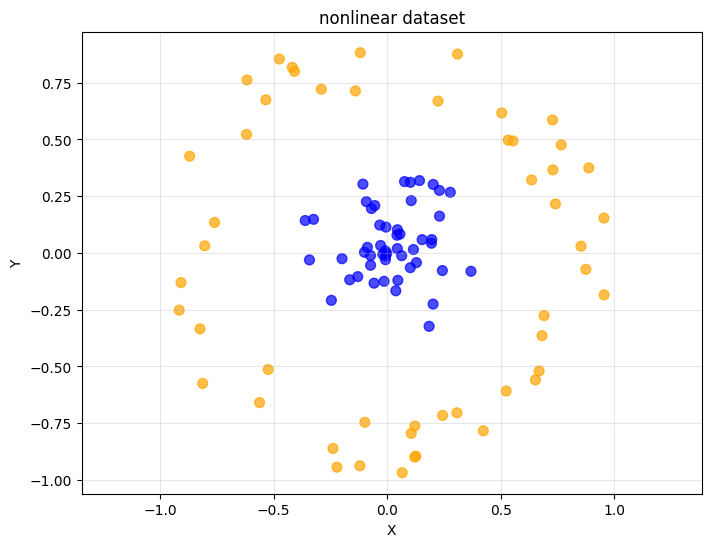

In [7]:
np.random.seed(42)
n_circle = 100
theta = np.random.rand(n_circle) * 2 * np.pi
r_inner = np.random.rand(n_circle//2) * 0.4
r_outer = np.random.rand(n_circle//2) * 0.3 + 0.7

X_inner = np.column_stack([r_inner * np.cos(theta[:n_circle//2]), 
                          r_inner * np.sin(theta[:n_circle//2])])
labels_inner = np.zeros(n_circle//2)

X_outer = np.column_stack([r_outer * np.cos(theta[n_circle//2:]), 
                          r_outer * np.sin(theta[n_circle//2:])])
labels_outer = np.ones(n_circle//2)

X_circle = np.vstack([X_inner, X_outer])
labels_circle = np.hstack([labels_inner, labels_outer])
colors_circle = ['blue' if label == 0 else 'orange' for label in labels_circle]

plt.figure(figsize=(8, 6))
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=colors_circle, alpha=0.7, s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('nonlinear dataset')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_circle, labels_circle, 
                                                    test_size=0.3, random_state=42)

results = []
for k in [1, 3, 5, 7, 10]:
    for metric in ['euclidean', 'manhattan']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        results.append({
            'K': k,
            'Metric': metric,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        })

print("\nсlassification results for a nonlinear dataset:")
for result in results:
    print(f"K={result['K']}, Metric={result['Metric']:10}: "
          f"Accuracy={result['Accuracy']:.3f}, "
          f"Precision={result['Precision']:.3f}, "
          f"Recall={result['Recall']:.3f}")


сlassification results for a nonlinear dataset:
K=1, Metric=euclidean : Accuracy=1.000, Precision=1.000, Recall=1.000
K=1, Metric=manhattan : Accuracy=1.000, Precision=1.000, Recall=1.000
K=3, Metric=euclidean : Accuracy=1.000, Precision=1.000, Recall=1.000
K=3, Metric=manhattan : Accuracy=1.000, Precision=1.000, Recall=1.000
K=5, Metric=euclidean : Accuracy=1.000, Precision=1.000, Recall=1.000
K=5, Metric=manhattan : Accuracy=1.000, Precision=1.000, Recall=1.000
K=7, Metric=euclidean : Accuracy=1.000, Precision=1.000, Recall=1.000
K=7, Metric=manhattan : Accuracy=1.000, Precision=1.000, Recall=1.000
K=10, Metric=euclidean : Accuracy=1.000, Precision=1.000, Recall=1.000
K=10, Metric=manhattan : Accuracy=1.000, Precision=1.000, Recall=1.000


Support Vector Machine

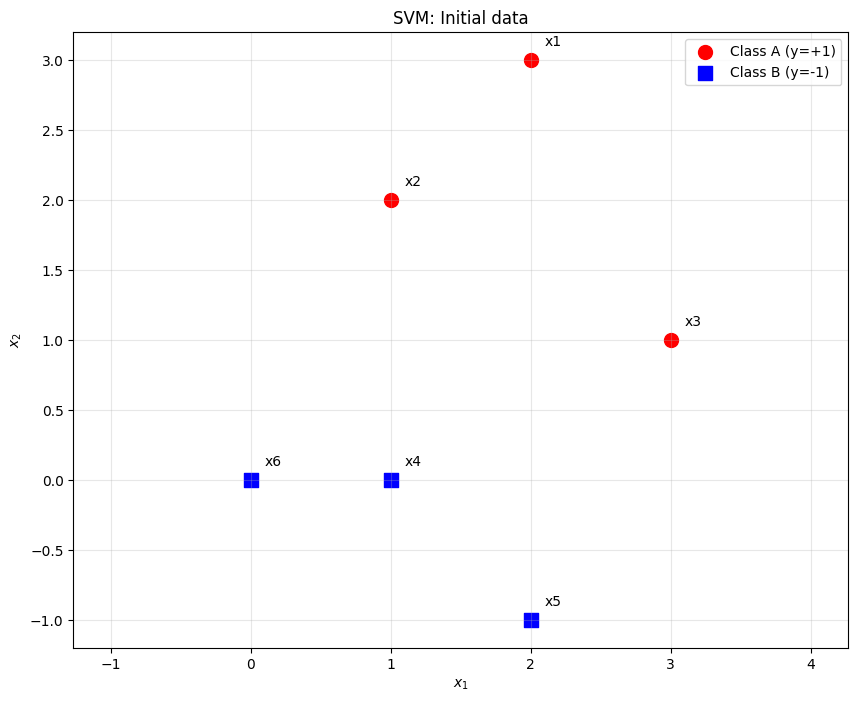

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
y = np.array([1, 1, 1, -1, -1, -1])

plt.figure(figsize=(10, 8))

class_A = X[y == 1]
class_B = X[y == -1]

plt.scatter(class_A[:, 0], class_A[:, 1], c='red', s=100, label='Class A (y=+1)', marker='o')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', s=100, label='Class B (y=-1)', marker='s')

for i, (x, y_val) in enumerate(zip(X, y)):
    plt.annotate(f'x{i+1}', (x[0] + 0.1, x[1] + 0.1))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVM: Initial data')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()

In [10]:
print("1.2: Linear separability means that there is a straight line that can")
print("ideally separate the two classes. This simplifies the classification task")
print()
print("1.3: Yes, the classes are linearly separable. You can draw a dividing line")
print()
print("1.4: Margin is the distance from the separating hyperplane to the nearest")
print("points of each class")
print()
print("1.5: Maximizing the gap improves the generalizing ability of the model and makes it")
print ("it is more resistant to noise in the data")

1.2: Linear separability means that there is a straight line that can
ideally separate the two classes. This simplifies the classification task

1.3: Yes, the classes are linearly separable. You can draw a dividing line

1.4: Margin is the distance from the separating hyperplane to the nearest
points of each class

1.5: Maximizing the gap improves the generalizing ability of the model and makes it
it is more resistant to noise in the data


In [11]:
print("2.1: Margin constraints for eahc point:")
print("Formula: y_i(β₁x₁ + β₂x₂ + β₀) ≥ 1")
print()

points = [
    ([2, 3], 1, "x₁"),
    ([1, 2], 1, "x₂"), 
    ([3, 1], 1, "x₃"),
    ([1, 0], -1, "x₄"),
    ([2, -1], -1, "x₅"),
    ([0, 0], -1, "x₆")
]

for point, y_i, name in points:
    print(f"{name}: {y_i} * (β₁*{point[0]} + β₂*{point[1]} + β₀) ≥ 1")

2.1: Margin constraints for eahc point:
Formula: y_i(β₁x₁ + β₂x₂ + β₀) ≥ 1

x₁: 1 * (β₁*2 + β₂*3 + β₀) ≥ 1
x₂: 1 * (β₁*1 + β₂*2 + β₀) ≥ 1
x₃: 1 * (β₁*3 + β₂*1 + β₀) ≥ 1
x₄: -1 * (β₁*1 + β₂*0 + β₀) ≥ 1
x₅: -1 * (β₁*2 + β₂*-1 + β₀) ≥ 1
x₆: -1 * (β₁*0 + β₂*0 + β₀) ≥ 1


In [14]:
print("\n2.2: margin constraints provide:")
print("For y_i= +1: βᵀx_i + β₀ ≥ 1 (the point is to the right of the dividing line)")
print("For y_i = -1: βᵀx_i + β₀ ≤ -1 (the point is to the left of the dividing line)")
print("this creates a some buffer zone around the separating hyperplane")


2.2: margin constraints provide:
For y_i= +1: βᵀx_i + β₀ ≥ 1 (the point is to the right of the dividing line)
For y_i = -1: βᵀx_i + β₀ ≤ -1 (the point is to the left of the dividing line)
this creates a some buffer zone around the separating hyperplane



check for β = [1, -1], β₀ = 0:
x₁: 1 * (-1.0) = -1.0 ✗
x₂: 1 * (-1.0) = -1.0 ✗
x₃: 1 * (2.0) = 2.0 ✓
x₄: -1 * (1.0) = -1.0 ✗
x₅: -1 * (3.0) = -3.0 ✗
x₆: -1 * (0.0) = 0.0 ✗


(-2.0, 4.0)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


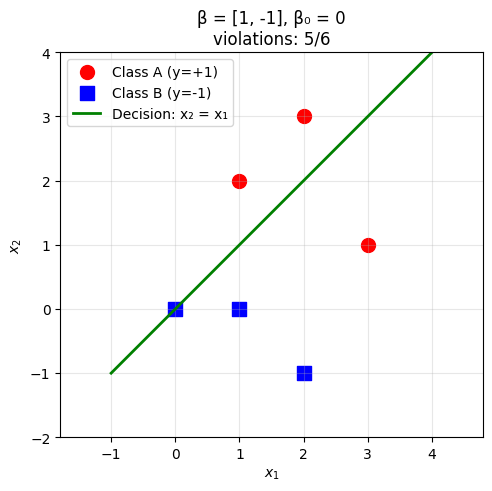

In [15]:
def check_constraints(beta, beta_0, points):
    print(f"\ncheck for β = {beta}, β₀ = {beta_0}:")
    
    violations = 0
    for point, y_i, name in points:
        value = beta[0] * point[0] + beta[1] * point[1] + beta_0
        constraint = y_i * value
        satisfied = constraint >= 1
        
        status = "✓" if satisfied else "✗"
        print(f"{name}: {y_i} * ({value:.1f}) = {constraint:.1f} {status}")
        
        if not satisfied:
            violations += 1
    
    return violations

beta1 = [1, -1]
beta0_1 = 0
violations1 = check_constraints(beta1, beta0_1, points)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(class_A[:, 0], class_A[:, 1], c='red', s=100, label='Class A (y=+1)', marker='o')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', s=100, label='Class B (y=-1)', marker='s')

x_line = np.array([-1, 4])
y_line = x_line  # x2 = x1
plt.plot(x_line, y_line, 'g-', label='Decision: x₂ = x₁', linewidth=2)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(f'β = [1, -1], β₀ = 0\nviolations: {violations1}/6')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-2, 4)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.



check for β = [2, 2], β₀ = -4:
x₁: 1 * (6.0) = 6.0 ✓
x₂: 1 * (2.0) = 2.0 ✓
x₃: 1 * (4.0) = 4.0 ✓
x₄: -1 * (-2.0) = 2.0 ✓
x₅: -1 * (-2.0) = 2.0 ✓
x₆: -1 * (-4.0) = 4.0 ✓

length of vector β: ||β|| = √(2² + 2²) = 2.828
Margin: M = 1/||β|| = 0.354


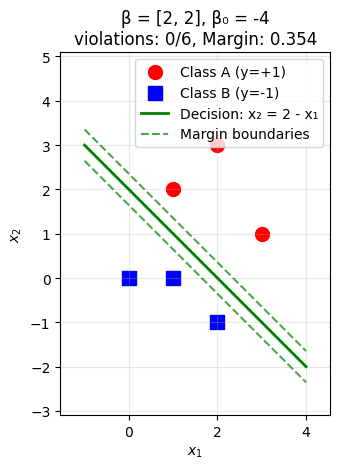

In [16]:
beta2 = [2, 2]
beta0_2 = -4
violations2 = check_constraints(beta2, beta0_2, points)

norm_beta2 = np.sqrt(beta2[0]**2 + beta2[1]**2)
margin2 = 1 / norm_beta2

print(f"\nlength of vector β: ||β|| = √({beta2[0]}² + {beta2[1]}²) = {norm_beta2:.3f}")
print(f"Margin: M = 1/||β|| = {margin2:.3f}")

plt.subplot(1, 2, 2)
plt.scatter(class_A[:, 0], class_A[:, 1], c='red', s=100, label='Class A (y=+1)', marker='o')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', s=100, label='Class B (y=-1)', marker='s')

y_line2 = 2 - x_line
plt.plot(x_line, y_line2, 'g-', label='Decision: x₂ = 2 - x₁', linewidth=2)

plt.plot(x_line, y_line2 + margin2, 'g--', alpha=0.7, label='Margin boundaries')
plt.plot(x_line, y_line2 - margin2, 'g--', alpha=0.7)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(f'β = [2, 2], β₀ = -4\nviolations: {violations2}/6, Margin: {margin2:.3f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-2, 4)

plt.tight_layout()
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.



2.5: using sklearn SVC to find the optimal dividing line:
finding parameters:
β = [0.500, 1.000]
β₀ = -1.499
support vectors: [[1. 0.]
 [1. 2.]
 [3. 1.]]


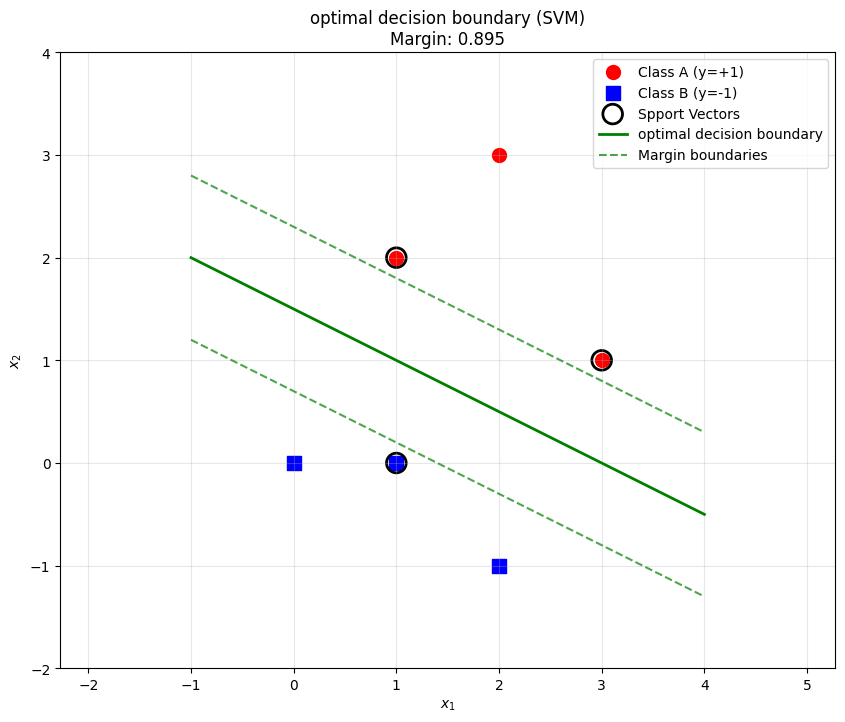


Optimal margin: 0.895


In [17]:
print("\n2.5: using sklearn SVC to find the optimal dividing line:")

svm_hard = SVC(kernel='linear', C=1000) 
svm_hard.fit(X, y)

w = svm_hard.coef_[0]
b = svm_hard.intercept_[0]
support_vectors = svm_hard.support_vectors_

print(f"finding parameters:")
print(f"β = [{w[0]:.3f}, {w[1]:.3f}]")
print(f"β₀ = {b:.3f}")
print(f"support vectors: {support_vectors}")

plt.figure(figsize=(10, 8))
plt.scatter(class_A[:, 0], class_A[:, 1], c='red', s=100, label='Class A (y=+1)', marker='o')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', s=100, label='Class B (y=-1)', marker='s')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=200, facecolors='none', edgecolors='black', 
           linewidths=2, label='Spport Vectors')

x_plot = np.array([-1, 4])
y_plot = (-w[0] * x_plot - b) / w[1]
plt.plot(x_plot, y_plot, 'g-', linewidth=2, label='optimal decision boundary')

margin_optimal = 1 / np.sqrt(w[0]**2 + w[1]**2)
y_margin_upper = y_plot + margin_optimal * np.abs(w[1]) / np.linalg.norm(w)
y_margin_lower = y_plot - margin_optimal * np.abs(w[1]) / np.linalg.norm(w)

plt.plot(x_plot, y_margin_upper, 'g--', alpha=0.7, label='Margin boundaries')
plt.plot(x_plot, y_margin_lower, 'g--', alpha=0.7)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(f'optimal decision boundary (SVM)\nMargin: {margin_optimal:.3f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-2, 4)
plt.show()

print(f"\nOptimal margin: {margin_optimal:.3f}")

3. Soft-Margin SVM with new points:
new points:
x₇ = [1, 3], y₇ = +1
x₈ = [3, -2], y₈ = -1


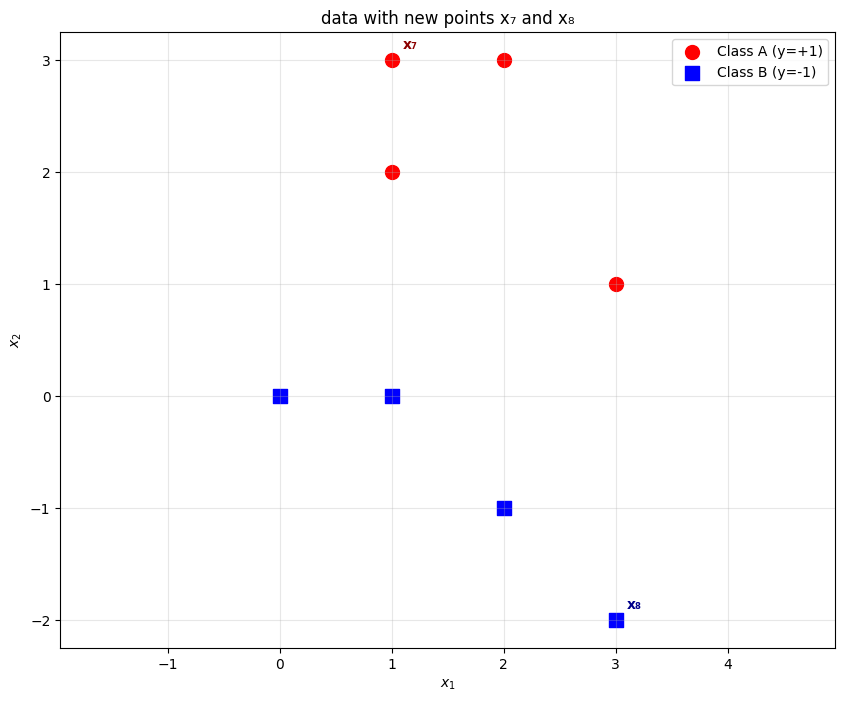

In [18]:
X_new = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0], [1, 3], [3, -2]])
y_new = np.array([1, 1, 1, -1, -1, -1, 1, -1])

print("3. Soft-Margin SVM with new points:")
print("new points:")
print("x₇ = [1, 3], y₇ = +1")
print("x₈ = [3, -2], y₈ = -1")

plt.figure(figsize=(10, 8))

class_A_new = X_new[y_new == 1]
class_B_new = X_new[y_new == -1]

plt.scatter(class_A_new[:, 0], class_A_new[:, 1], c='red', s=100, label='Class A (y=+1)', marker='o')
plt.scatter(class_B_new[:, 0], class_B_new[:, 1], c='blue', s=100, label='Class B (y=-1)', marker='s')

plt.annotate('x₇', (1 + 0.1, 3 + 0.1), color='darkred', fontweight='bold')
plt.annotate('x₈', (3 + 0.1, -2 + 0.1), color='darkblue', fontweight='bold')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('data with new points x₇ and x₈')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()

In [19]:
def compute_slack_variables(beta, beta_0, points):
    print("slack variables ξᵢ = max(0, 1 - y_i(βᵀx_i + β₀)):")
    print()
    
    total_slack = 0
    violations = []
    
    for i, (point, y_i, name) in enumerate(points, 1):
        value = beta[0] * point[0] + beta[1] * point[1] + beta_0
        margin_value = y_i * value
        xi = max(0, 1 - margin_value)
        
        total_slack += xi
        
        status = "violation" if xi > 0 else "OK"
        if xi > 0:
            violations.append((name, xi))
        
        print(f"{name}: ξ_{i} = max(0, 1 - ({y_i} * {value:.2f})) = max(0, 1 - {margin_value:.2f}) = {xi:.2f} [{status}]")
    
    return total_slack, violations

beta_optimal = w
beta0_optimal = b

points_new = [
    ([2, 3], 1, "x₁"),
    ([1, 2], 1, "x₂"), 
    ([3, 1], 1, "x₃"),
    ([1, 0], -1, "x₄"),
    ([2, -1], -1, "x₅"),
    ([0, 0], -1, "x₆"),
    ([1, 3], 1, "x₇"),
    ([3, -2], -1, "x₈")
]

total_slack, violations = compute_slack_variables(beta_optimal, beta0_optimal, points_new)

print(f"\n3.3: total sum of  slack variables: ∑ξᵢ = {total_slack:.2f}")
print(f"points with violations: {[v[0] for v in violations]}")

slack variables ξᵢ = max(0, 1 - y_i(βᵀx_i + β₀)):

x₁: ξ_1 = max(0, 1 - (1 * 2.50)) = max(0, 1 - 2.50) = 0.00 [OK]
x₂: ξ_2 = max(0, 1 - (1 * 1.00)) = max(0, 1 - 1.00) = 0.00 [violation]
x₃: ξ_3 = max(0, 1 - (1 * 1.00)) = max(0, 1 - 1.00) = 0.00 [violation]
x₄: ξ_4 = max(0, 1 - (-1 * -1.00)) = max(0, 1 - 1.00) = 0.00 [violation]
x₅: ξ_5 = max(0, 1 - (-1 * -1.50)) = max(0, 1 - 1.50) = 0.00 [OK]
x₆: ξ_6 = max(0, 1 - (-1 * -1.50)) = max(0, 1 - 1.50) = 0.00 [OK]
x₇: ξ_7 = max(0, 1 - (1 * 2.00)) = max(0, 1 - 2.00) = 0.00 [OK]
x₈: ξ_8 = max(0, 1 - (-1 * -2.00)) = max(0, 1 - 2.00) = 0.00 [OK]

3.3: total sum of  slack variables: ∑ξᵢ = 0.00
points with violations: ['x₂', 'x₃', 'x₄']


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.



4. Effect of parameter C:
C = regulation parameter
- Large C: severe punishment for violations → smaller margin, fewer errors
- Small C: weak punishment for violations → larger margin, more errors

Examples:
C = 1000: Hard-Margin SVM (almost does not allow violations)
C = 1: Balance between margin and errors
C = 0.1: Soft-Margin with violations for a larger margin


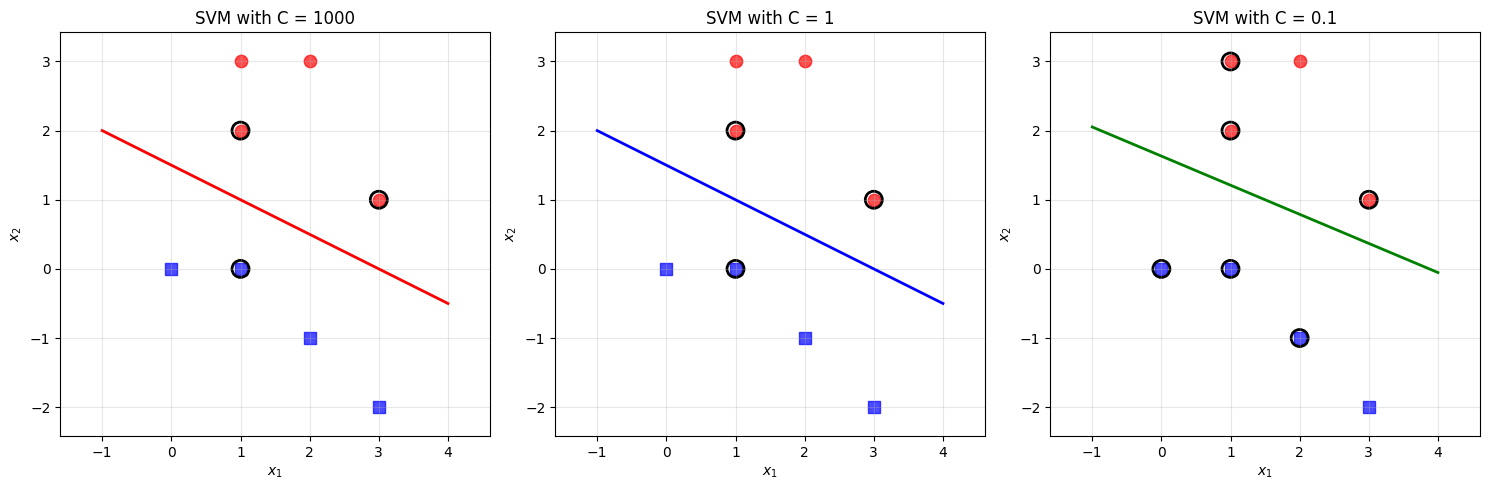

In [20]:
print("\n4. Effect of parameter C:")
print("C = regulation parameter")
print("- Large C: severe punishment for violations → smaller margin, fewer errors")
print("- Small C: weak punishment for violations → larger margin, more errors")
print()
print("Examples:")
print("C = 1000: Hard-Margin SVM (almost does not allow violations)")
print ("C = 1: Balance between margin and errors")
print("C = 0.1: Soft-Margin with violations for a larger margin")

plt.figure(figsize=(15, 5))

C_values = [1000, 1, 0.1]
colors = ['red', 'blue', 'green']

for i, C_val in enumerate(C_values):
    plt.subplot(1, 3, i+1)
    
    svm = SVC(kernel='linear', C=C_val)
    svm.fit(X_new, y_new)
    
    w_C = svm.coef_[0]
    b_C = svm.intercept_[0]
    sv_C = svm.support_vectors_
    
    plt.scatter(class_A_new[:, 0], class_A_new[:, 1], c='red', s=80, marker='o', alpha=0.7)
    plt.scatter(class_B_new[:, 0], class_B_new[:, 1], c='blue', s=80, marker='s', alpha=0.7)
    plt.scatter(sv_C[:, 0], sv_C[:, 1], s=150, facecolors='none', edgecolors='black', linewidths=2)
    
    x_plot = np.array([-1, 4])
    y_plot = (-w_C[0] * x_plot - b_C) / w_C[1]
    plt.plot(x_plot, y_plot, color=colors[i], linewidth=2, label=f'C = {C_val}')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'SVM with C = {C_val}')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.xlim(-1, 4)
    plt.ylim(-3, 4)

plt.tight_layout()
plt.show()

Analysis of Soft-Margin SVM for our data:
SVM training with different C values:
--------------------------------------------------
C =   0.01: support vectors =  8, Margin = 8.305
C =   0.10: support vectors =  6, Margin = 1.649
C =   1.00: support vectors =  3, Margin = 0.894
C =  10.00: support vectors =  3, Margin = 0.894
C = 100.00: support vectors =  3, Margin = 0.894
C = 1000.00: support vectors =  3, Margin = 0.894


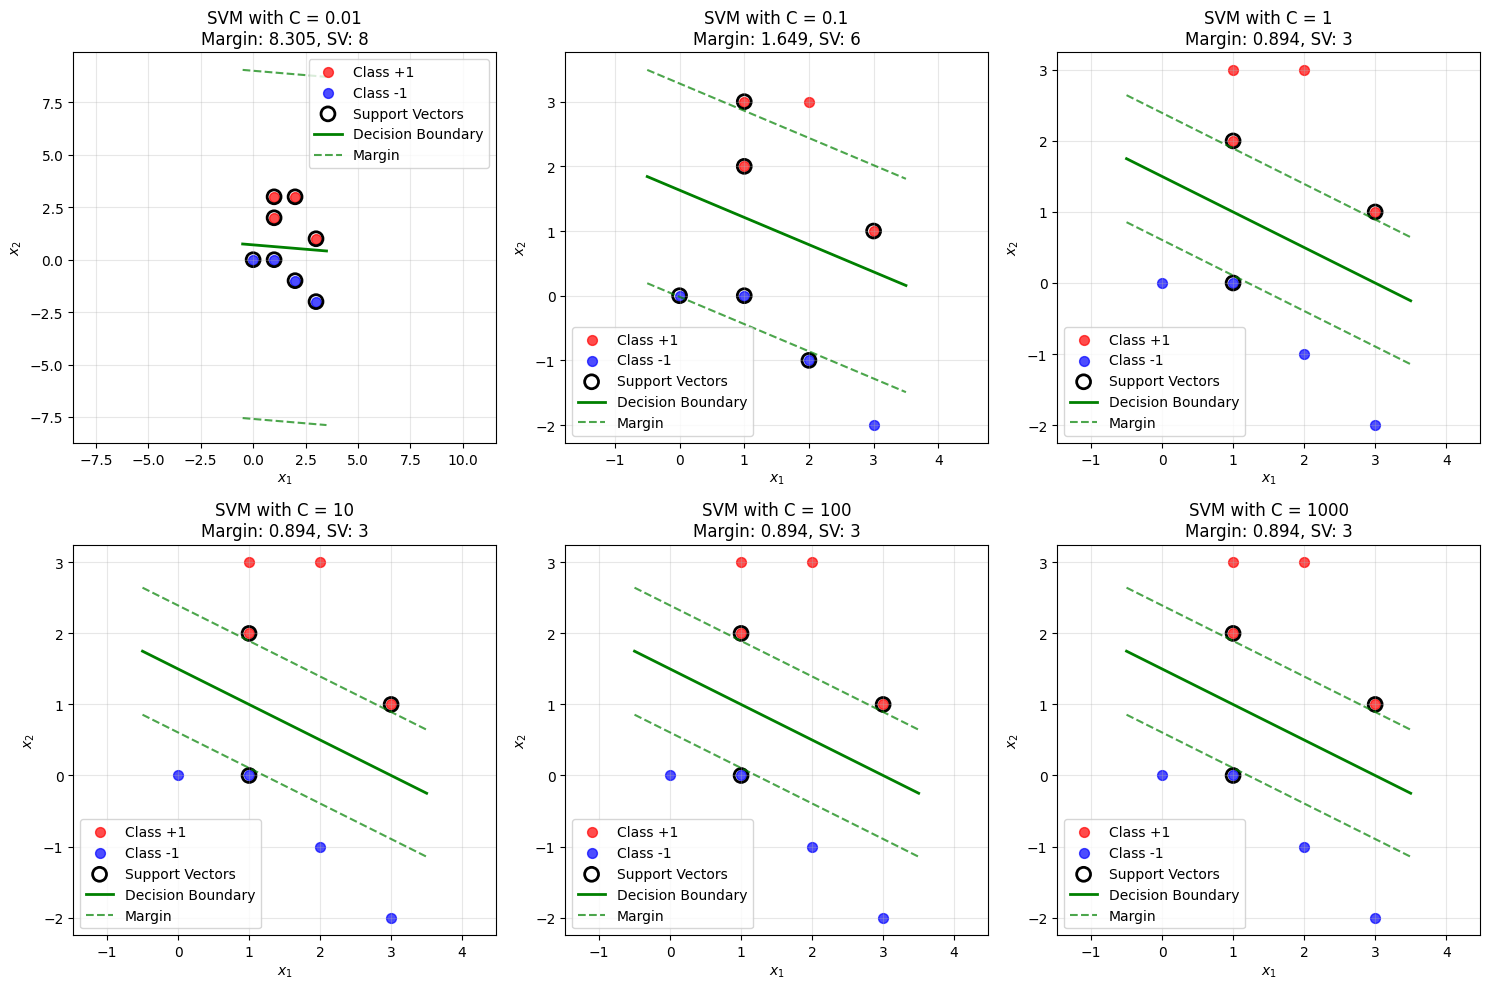


Analysis of the trade-off between margin and violations:
------------------------------------------------------------
C =   0.01: Margin = 8.3045, Support Vectors =  8
C =   0.10: Margin = 1.6492, Support Vectors =  6
C =   1.00: Margin = 0.8941, Support Vectors =  3
C =  10.00: Margin = 0.8941, Support Vectors =  3
C = 100.00: Margin = 0.8941, Support Vectors =  3
C = 1000.00: Margin = 0.8941, Support Vectors =  3


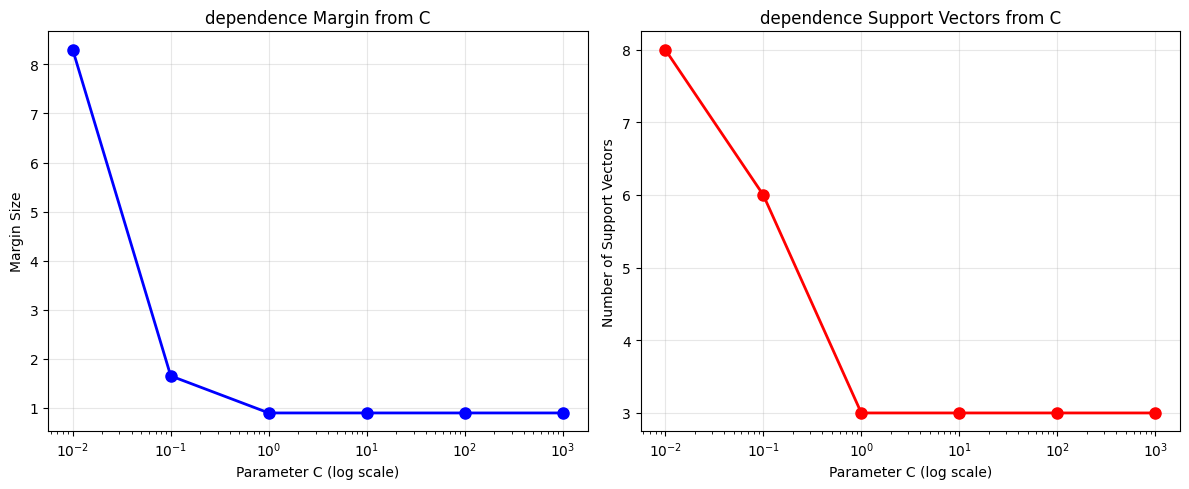

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class SoftMarginSVMAnalysis: 
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.models = {}
        self.results = {}
    
    def train_models(self, C_values=[0.01, 0.1, 1, 10, 100]):
        print("SVM training with different C values:")
        print("-" * 50)
        
        for C in C_values:
            svm = SVC(kernel='linear', C=C, random_state=42)
            svm.fit(self.X, self.y)
            self.models[C] = svm
            
            n_support_vectors = len(svm.support_vectors_)
            n_violations = n_support_vectors - 2 
            
            w = svm.coef_[0]
            margin = 1 / np.linalg.norm(w)
            
            self.results[C] = {
                'model': svm,
                'n_support_vectors': n_support_vectors,
                'margin': margin,
                'w': w,
                'b': svm.intercept_[0]
            }
            
            print(f"C = {C:6.2f}: support vectors = {n_support_vectors:2d}, "
                  f"Margin = {margin:.3f}")
    
    def plot_comparison(self):
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        
        C_values = sorted(self.models.keys())
        
        for i, C in enumerate(C_values):
            if i >= len(axes):
                break
                
            ax = axes[i]
            model = self.models[C]
            result = self.results[C]
            
            class_1 = self.X[self.y == 1]
            class_2 = self.X[self.y == -1]
            
            ax.scatter(class_1[:, 0], class_1[:, 1], c='red', s=50, alpha=0.7, label='Class +1')
            ax.scatter(class_2[:, 0], class_2[:, 1], c='blue', s=50, alpha=0.7, label='Class -1')
            
            ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                      s=100, facecolors='none', edgecolors='black', linewidth=2,
                      label='Support Vectors')
            
            w = result['w']
            b = result['b']
            
            x_plot = np.linspace(self.X[:, 0].min()-0.5, self.X[:, 0].max()+0.5, 100)
            y_plot = (-w[0] * x_plot - b) / w[1]
            
            ax.plot(x_plot, y_plot, 'g-', linewidth=2, label='Decision Boundary')
            
            margin = result['margin']
            y_margin_upper = y_plot + margin
            y_margin_lower = y_plot - margin
            
            ax.plot(x_plot, y_margin_upper, 'g--', alpha=0.7, label='Margin')
            ax.plot(x_plot, y_margin_lower, 'g--', alpha=0.7)
            
            ax.set_title(f'SVM with C = {C}\nMargin: {margin:.3f}, SV: {result["n_support_vectors"]}')
            ax.set_xlabel('$x_1$')
            ax.set_ylabel('$x_2$')
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.axis('equal')
        
        for i in range(len(C_values), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    def analyze_tradeoff(self):
        print("\nAnalysis of the trade-off between margin and violations:")
        print("-" * 60)
        
        C_values = sorted(self.models.keys())
        margins = []
        n_support_vectors = []
        
        for C in C_values:
            result = self.results[C]
            margins.append(result['margin'])
            n_support_vectors.append(result['n_support_vectors'])
            
            print(f"C = {C:6.2f}: Margin = {result['margin']:.4f}, "
                  f"Support Vectors = {result['n_support_vectors']:2d}")
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.semilogx(C_values, margins, 'bo-', linewidth=2, markersize=8)
        plt.xlabel('Parameter C (log scale)')
        plt.ylabel('Margin Size')
        plt.title('dependence Margin from C')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.semilogx(C_values, n_support_vectors, 'ro-', linewidth=2, markersize=8)
        plt.xlabel('Parameter C (log scale)')
        plt.ylabel('Number of Support Vectors')
        plt.title('dependence Support Vectors from C')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

print("Analysis of Soft-Margin SVM for our data:")
analysis = SoftMarginSVMAnalysis(X_new, y_new)
analysis.train_models(C_values=[0.01, 0.1, 1, 10, 100, 1000])
analysis.plot_comparison()
analysis.analyze_tradeoff()

Non-linearly separable data:
Dimension: (100, 2)
Classes: [-1  1]


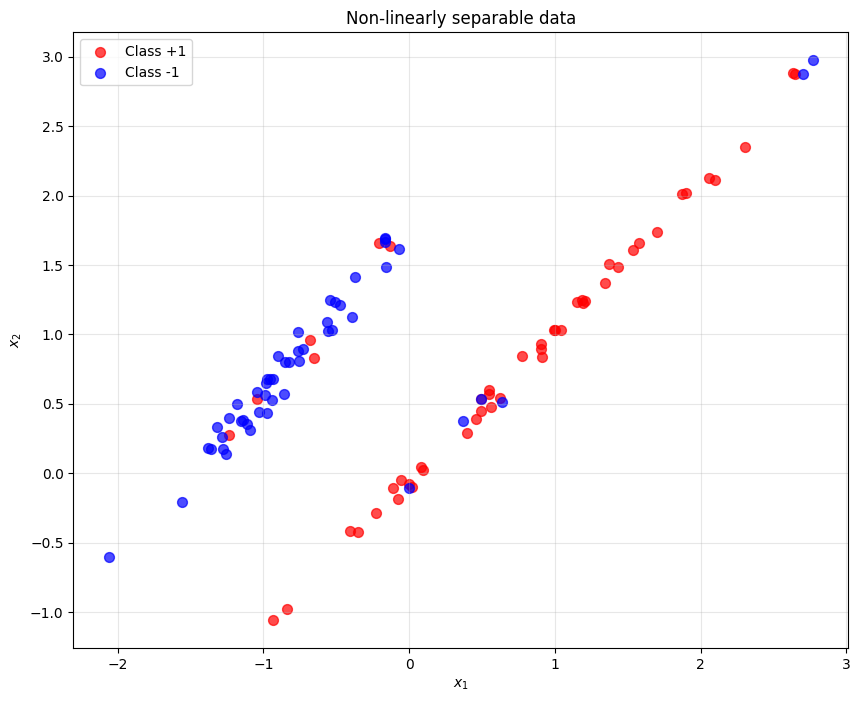

Soft-Margin SVM analysis for non-linearly separable data:
SVM training with different C values:
--------------------------------------------------
C =   0.00: support vectors = 100, Margin = 15.474
C =   0.01: support vectors = 96, Margin = 1.797
C =   0.10: support vectors = 57, Margin = 0.618
C =   1.00: support vectors = 31, Margin = 0.541
C =  10.00: support vectors = 28, Margin = 0.531
C = 100.00: support vectors = 28, Margin = 0.531


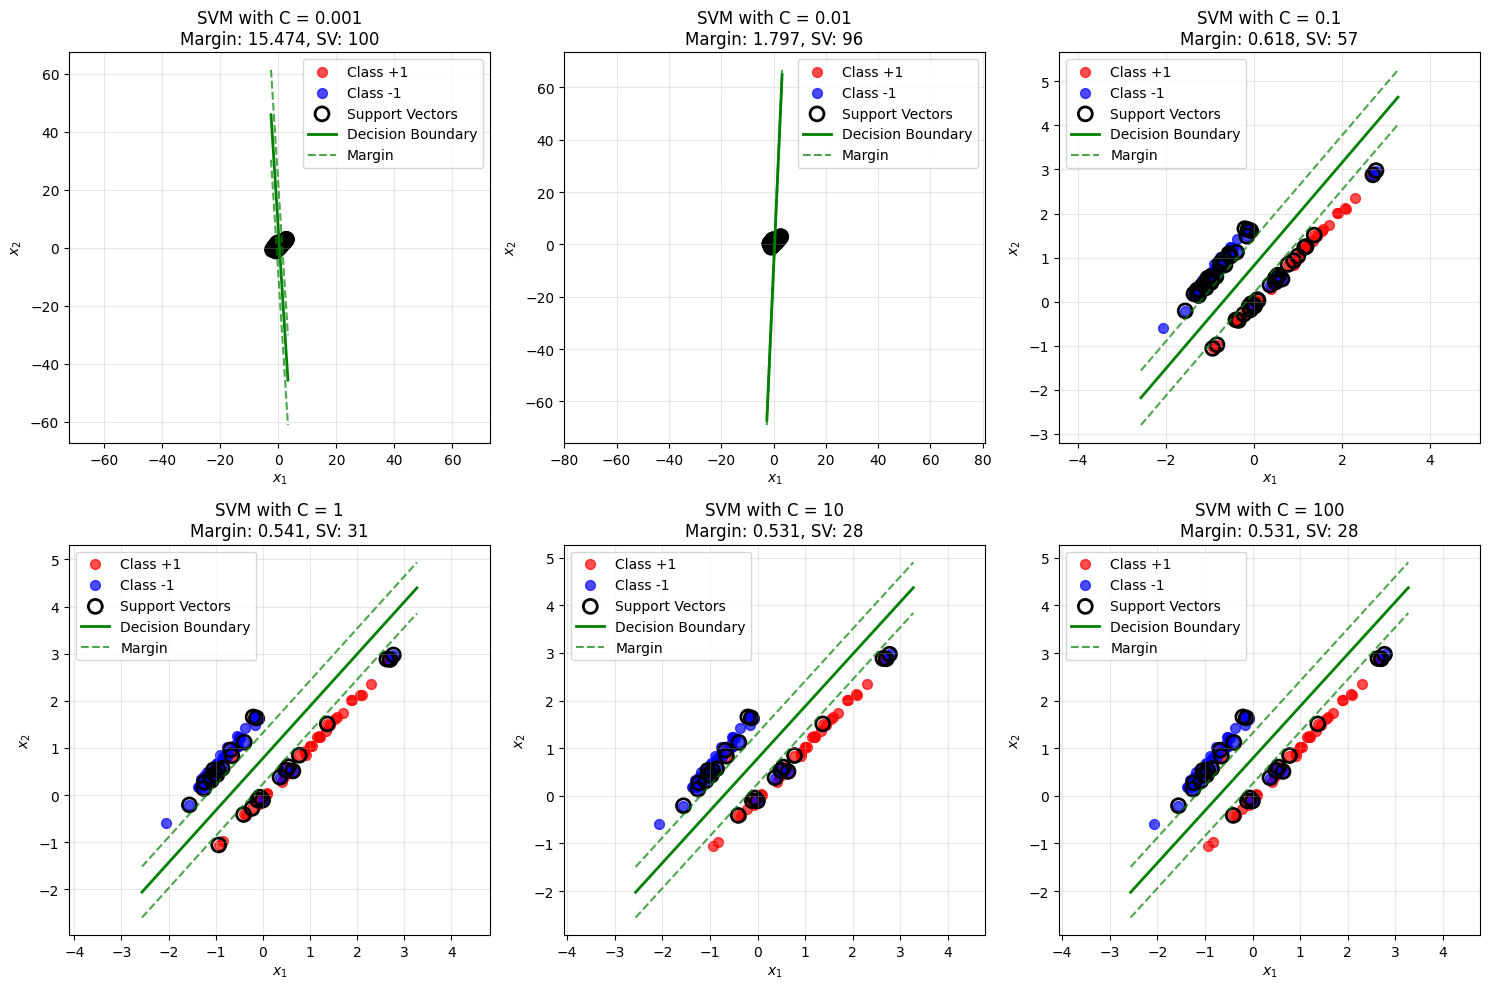

In [22]:
np.random.seed(42)
X_nonlinear, y_nonlinear = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.1, class_sep=0.8, random_state=42
)
y_nonlinear = 2 * y_nonlinear - 1 

print("Non-linearly separable data:")
print(f"Dimension: {X_nonlinear.shape}")
print(f"Classes: {np.unique(y_nonlinear)}")

plt.figure(figsize=(10, 8))
class_1_nl = X_nonlinear[y_nonlinear == 1]
class_2_nl = X_nonlinear[y_nonlinear == -1]

plt.scatter(class_1_nl[:, 0], class_1_nl[:, 1], c='red', s=50, alpha=0.7, label='Class +1')
plt.scatter(class_2_nl[:, 0], class_2_nl[:, 1], c='blue', s=50, alpha=0.7, label='Class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Non-linearly separable data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Soft-Margin SVM analysis for non-linearly separable data:")
analysis_nonlinear = SoftMarginSVMAnalysis(X_nonlinear, y_nonlinear)
analysis_nonlinear.train_models(C_values=[0.001, 0.01, 0.1, 1, 10, 100])
analysis_nonlinear.plot_comparison()

In [23]:
def detailed_slack_analysis(X, y, beta, beta_0):
    print("Detailed analysis of Slack Variables and Hinge Loss:")
    print("=" * 70)
    
    n_samples = len(X)
    total_hinge_loss = 0
    violations_info = []
    
    print(f"{'Point':^6} {'y_i':^4} {'βᵀx_i + β₀':^10} {'y_i*(βᵀx_i+β₀)':^12} {'ξ_i':^8} {'Status':^12}")
    print("-" * 70)
    
    for i, (x_i, y_i) in enumerate(zip(X, y), 1):
        prediction = np.dot(beta, x_i) + beta_0
        margin = y_i * prediction
        xi = max(0, 1 - margin) 
        
        total_hinge_loss += xi

        if margin >= 1:
            status = "Correct"
        elif margin >= 0:
            status = "Margin Viol"
        else:
            status = "Misclassified"
        
        if xi > 0:
            violations_info.append((i, xi, status))
        
        print(f"{f'x_{i}':^6} {y_i:^4} {prediction:>9.3f} {margin:>11.3f} {xi:>7.3f} {status:^12}")
    
    print("-" * 70)
    print(f"Total Hinge Loss: {total_hinge_loss:.3f}")
    print(f"Average Hinge Loss: {total_hinge_loss/n_samples:.3f}")
    print(f"Number of violations: {len(violations_info)}")
    
    if violations_info:
        print("\nPoints with violations:")
        for point, xi, status in violations_info:
            print(f"  x_{point}: ξ = {xi:.3f} ({status})")
    
    return total_hinge_loss, violations_info

optimal_model = analysis.models[1]  
w_optimal = optimal_model.coef_[0]
b_optimal = optimal_model.intercept_[0]

print("Analysis for optimal model (C=1):")
total_loss, violations = detailed_slack_analysis(X_new, y_new, w_optimal, b_optimal)

Analysis for optimal model (C=1):
Detailed analysis of Slack Variables and Hinge Loss:
Point  y_i  βᵀx_i + β₀ y_i*(βᵀx_i+β₀)   ξ_i       Status   
----------------------------------------------------------------------
 x_1    1       2.501       2.501   0.000   Correct   
 x_2    1       1.000       1.000   0.000   Correct   
 x_3    1       1.000       1.000   0.000   Correct   
 x_4    -1     -1.001       1.001   0.000   Correct   
 x_5    -1     -1.501       1.501   0.000   Correct   
 x_6    -1     -1.501       1.501   0.000   Correct   
 x_7    1       2.001       2.001   0.000   Correct   
 x_8    -1     -2.001       2.001   0.000   Correct   
----------------------------------------------------------------------
Total Hinge Loss: 0.000
Average Hinge Loss: 0.000
Number of violations: 0


Kernel comparison for non-linearly separable data:
Comparison of different SVM cores:


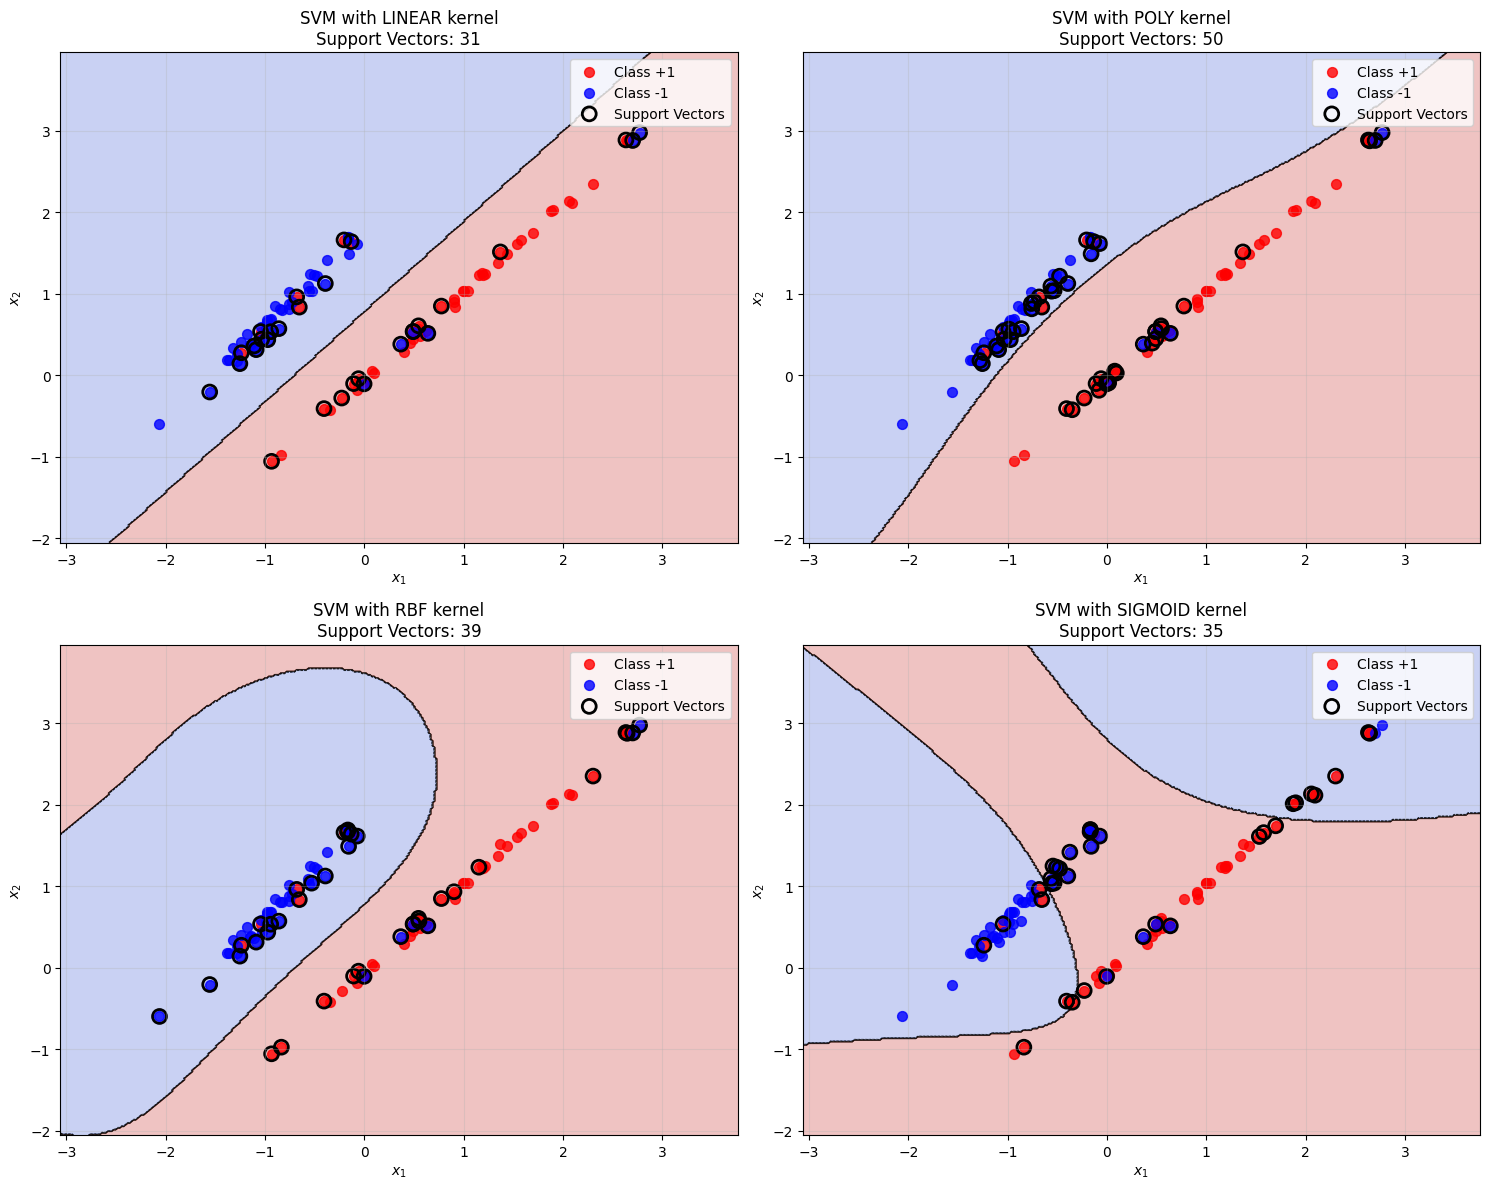

In [24]:
def compare_kernels(X, y, C=1.0):
    print("Comparison of different SVM cores:")
    print("=" * 60)
    
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    models = {}
    
    plt.figure(figsize=(15, 12))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    for i, kernel in enumerate(kernels, 1):
        if kernel == 'poly':
            svm = SVC(kernel=kernel, C=C, degree=3, random_state=42)
        else:
            svm = SVC(kernel=kernel, C=C, random_state=42)
        
        svm.fit(X, y)
        models[kernel] = svm
        
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(2, 2, i)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
        
        class_1 = X[y == 1]
        class_2 = X[y == -1]
        plt.scatter(class_1[:, 0], class_1[:, 1], c='red', s=50, alpha=0.8, label='Class +1')
        plt.scatter(class_2[:, 0], class_2[:, 1], c='blue', s=50, alpha=0.8, label='Class -1')
        
        plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='black', linewidth=2,
                   label='Support Vectors')
        
        plt.title(f'SVM with {kernel.upper()} kernel\nSupport Vectors: {len(svm.support_vectors_)}')
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return models

print("Kernel comparison for non-linearly separable data:")
kernel_models = compare_kernels(X_nonlinear, y_nonlinear, C=1.0)

In [26]:
def svm_practical_guide():
    print("\n" +"="*70)
    print("PRACTICAL GUIDE TO SVM")
    print("="*70)
    
    guidelines = [
        {
"Aspect": "Choice C",
"Recommendations": [
"Small C (0.01-0.1): Large margin, allows violations",
                "Medium C (1-10): Balance between margin and accuracy",
"Large C (100+): Small margin, strict compliance with restrictions"
            ]
        },
        {
"Aspect": "Core selection",
            "Recommendations": [
                "linear: Linearly separable data, interpretability",
"poly: Polynomial dependencies, controlled complexity",
"rbf: Universal, complex nonlinear boundaries",
"sigmoid: Specific cases, similar to neural networks"
]
},
        {
"Aspect": "Support Vectors",
"Recommendations": [
"Define a dividing boundary",
"Many SV → complex boundary, possible overfitting",
"Few SV → simple boundary, possible underfitting"
            ]
        },
        {
"Aspect": "Data scaling",
"Recommendations": [
"Always scale data before SVM",
"SVM is sensitive to different feature scales",
"Use StandardScaler or MinMaxScaler"
            ]
        }
    ]
    
    for section in guidelines:
        print(f"\n{section['Aspect']}:")
        for rec in section['Recommendations']:
            print(f"  • {rec}")

svm_practical_guide()


PRACTICAL GUIDE TO SVM

Choice C:
  • Small C (0.01-0.1): Large margin, allows violations
  • Medium C (1-10): Balance between margin and accuracy
  • Large C (100+): Small margin, strict compliance with restrictions

Core selection:
  • linear: Linearly separable data, interpretability
  • poly: Polynomial dependencies, controlled complexity
  • rbf: Universal, complex nonlinear boundaries
  • sigmoid: Specific cases, similar to neural networks

Support Vectors:
  • Define a dividing boundary
  • Many SV → complex boundary, possible overfitting
  • Few SV → simple boundary, possible underfitting

Data scaling:
  • Always scale data before SVM
  • SVM is sensitive to different feature scales
  • Use StandardScaler or MinMaxScaler


In [27]:
def final_analysis():
    print("\n" +"="*70)
    print("FINAL ANALYSIS")
    print("="*70)
        
    print("\Key outputs for SVM:")
        
    key_points = [
            "1. Hard-Margin SVM only works for linearly separable data",
    "2. Soft-Margin SVM introduces slack variables to handle violations",
            "3. Parameter C controls the compromise between margin and errors",
    "4. Support vectors - key points defining the dividing boundary",
    "5. Different cores allow you to solve nonlinear problems",
            "6. Hinge loss quantifies constraint violations",
            "7. A large margin improves the generalizing ability of the model"
    ]
        
    for point in key_points:
            print(f"  {point}")
        
    print("\Matematicheskie basics:") 
    print(" • objective function: min ½ ||β||2 + C∑ξᵢ") 
    print(" • Restrictions: yᵢ(βᵀxᵢ + β₀) ≥ 1 - ξᵢ, ξᵢ ≥ 0") 
    print(" • Hinge loss: ξᵢ = max(0, 1 - yᵢ(βᵀxᵢ + β₀))") 
    print(" • Margin: M = 1/||β||")
        
    print("Practical application:")
    print(" • Start with a linear kernel and C=1")
    print(" • Use cross validation to match C")
    print(" • Analyze support vectors to understand the model")
    print(" • Scale data for better performance")

final_analysis()


FINAL ANALYSIS
\Key outputs for SVM:
  1. Hard-Margin SVM only works for linearly separable data
  2. Soft-Margin SVM introduces slack variables to handle violations
  3. Parameter C controls the compromise between margin and errors
  4. Support vectors - key points defining the dividing boundary
  5. Different cores allow you to solve nonlinear problems
  6. Hinge loss quantifies constraint violations
  7. A large margin improves the generalizing ability of the model
\Matematicheskie basics:
 • objective function: min ½ ||β||2 + C∑ξᵢ
 • Restrictions: yᵢ(βᵀxᵢ + β₀) ≥ 1 - ξᵢ, ξᵢ ≥ 0
 • Hinge loss: ξᵢ = max(0, 1 - yᵢ(βᵀxᵢ + β₀))
 • Margin: M = 1/||β||
Practical application:
 • Start with a linear kernel and C=1
 • Use cross validation to match C
 • Analyze support vectors to understand the model
 • Scale data for better performance


<>:6: SyntaxWarning: invalid escape sequence '\K'
<>:21: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\K'
<>:21: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_21204\496502101.py:6: SyntaxWarning: invalid escape sequence '\K'
  print("\Key outputs for SVM:")
C:\Users\Admin\AppData\Local\Temp\ipykernel_21204\496502101.py:21: SyntaxWarning: invalid escape sequence '\M'
  print("\Matematicheskie basics:")


K-Nearest Neighbors
1. Distance Metric Selection
How to choose the distance metric in KNN:

Euclidean Distance: √(Σ(x_i - y_i)²)

Default choice for most applications

Works well when features are on similar scales

Sensitive to outliers due to squaring

Assumes isotropic data (equal importance in all directions)

Manhattan Distance: Σ|x_i - y_i|

More robust to outliers than Euclidean

Better for high-dimensional spaces

Preferred when features have different units or scales

Computationally faster for high dimensions

Cosine Similarity: (A·B)/(||A||·||B||)

Measures angular similarity rather than magnitude

Ideal for text data, document classification

Used when direction matters more than absolute distance

Invariant to scaling of vectors

Minkowski Distance: Generalized metric ((Σ|x_i - y_i|^p)^(1/p))

Parametric family including both Euclidean (p=2) and Manhattan (p=1)

Allows tuning based on data characteristics

Selection Criteria:

Start with Euclidean for numerical data

Use Manhattan for robustness to outliers

Choose Cosine for text/vector data

Consider feature scaling requirements

2. Impact of K Parameter
K Too Small (1-3):

High variance: Decision boundary becomes overly complex

Overfitting: Model captures noise rather than underlying pattern

Sensitivity: Highly affected by outliers and local anomalies

Unstable predictions: Small changes in training data cause large changes in predictions

Low bias: Can achieve perfect training accuracy but poor generalization

Moderate K (5-15):

Balanced approach: Good trade-off between bias and variance

Smoother decision boundary: Reduces effect of individual noisy points

Better generalization: More robust to variations in training data

Computational efficiency: Reasonable number of distance calculations

K Too Large (>20):

High bias: Decision boundary becomes overly smooth

Underfitting: May miss important local patterns

Class imbalance issues: Minority class points can be overwhelmed

Computational cost: More distance calculations required

Boundary blurring: May misclassify points near decision boundaries

Rule of thumb: K ≈ √n where n is number of training samples, but cross-validation is recommended for optimal selection.

Support Vector Machines
1.2 Linear Separability
Definition:
Two classes are linearly separable if there exists at least one hyperplane that can completely separate all instances of different classes without any misclassification.

Mathematical Formulation:
∃ β, β₀ such that:

y_i(βᵀx_i + β₀) > 0 for all i

Where y_i ∈ {-1, +1} and x_i are feature vectors

Geometric Interpretation:

In 2D: A straight line can separate all points

In 3D: A plane can separate all points

In n-D: A hyperplane can separate all points

Implications for Classification:

Simpler problem: Existence of perfect decision boundary

Hard-Margin SVM applicable: Can find solution with zero training error

Theoretical guarantees: Convergence and optimality proofs hold

No need for slack variables: Strict margin constraints suffice

Real-world Considerations:

Perfect linear separability is rare in practice

Noise and measurement errors often prevent ideal separation

Soft-margin SVM is typically more practical

Feature engineering can sometimes achieve linear separability

1.4-1.5 Margin and Maximization
Margin Definition:
The margin is the perpendicular distance between the decision boundary and the closest data points from each class. These closest points are called support vectors.

Mathematical Expression:

For a hyperplane: βᵀx + β₀ = 0

Margin width: M = 2/||β||

Distance from point to hyperplane: |βᵀx_i + β₀|/||β||

Why Maximize Margin:

Improved Generalization (Structural Risk Minimization):

Larger margin → simpler model → better generalization

Reduces overfitting by limiting model complexity

Theoretical bounds on generalization error depend on margin size

Robustness to Noise:

Points can move within margin without affecting classification

More tolerant to measurement errors and small variations

Better performance on unseen data

Confident Predictions:

Points farther from decision boundary have more certain classifications

Reduced ambiguity for borderline cases

Numerically more stable computations

Risks of Small Margin:

High sensitivity: Small data changes can flip predictions

Poor generalization: Model too specific to training data

High variance: Unstable performance on test data

Overfitting: Complex boundary that captures noise

Support Vectors Role:

Only support vectors affect the final decision boundary

Non-support vectors can be removed without changing the model

Efficient memory usage in the dual representation

4. Impact of Parameter C
C as Regularization Parameter:
C controls the trade-off between achieving a wide margin and minimizing classification errors.

Large C (C → ∞) - Hard Margin SVM:

Strict constraints: y_i(βᵀx_i + β₀) ≥ 1 must be satisfied for all points

Minimal margin violations: ξ_i ≈ 0 for all i

Narrow margin: Focuses on correct classification over margin width

Risk of overfitting: May capture noise in pursuit of perfect separation

Sensitive to outliers: Single outlier can dramatically affect boundary

Small C (C → 0) - Soft Margin SVM:

Lenient constraints: Allows substantial margin violations

Large margin: Prioritizes wide separation between classes

Robust to noise: Tolerates outliers and mislabeled points

Risk of underfitting: May oversimplify complex patterns

Better generalization: Often performs better on test data

Optimal C Selection:

Cross-validation: Essential for finding appropriate C value

Domain knowledge: Depends on noise level in data

Grid search: Systematic exploration of C values

Performance metrics: Balance between precision and recall